# CLASIFICADOR BINARIO - Gestión del sobreajuste (OVERFITTING)

Varios experimentos para mitigar el sobreajuste/OVERFITTING de un modelo de clasificación binaria

### Importamos librerias

In [16]:
import numpy as np
import matplotlib.pyplot as plt


from keras import models, layers, optimizers, losses, metrics
from keras.datasets import imdb

import warnings
warnings.filterwarnings("ignore")

### Obtención de los datasets

In [17]:
LIMIT_WORD = 10000

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=LIMIT_WORD)

### Exploración de datos (convertir secuencias a revisión original)

In [18]:
def convert_to_english(sequence):
    word_index = imdb.get_word_index()
    reverse_word_index = dict(
        [(value, key) for (key, value) in word_index.items()]
    )
    decoded_review = " ".join(
        [reverse_word_index.get(i - 3, '?') for i in sequence]
    )
    
    return decoded_review

In [19]:
print(convert_to_english(train_data[0]))

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

### Preparar los datos (convertir secuencias en tensores)

In [20]:
def vectorize_sequences(sequences, dimension=LIMIT_WORD):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    
    return results

#### Vectorizar características / variables de entrada

In [21]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [22]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

#### Vectorizar etiquetas

In [23]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [24]:
y_train[0]

1.0

## Utilidades

- compiler
- trainer
- plotter

In [30]:
def compile_model(model):
    model.compile(
        optimizer=optimizers.RMSprop(learning_rate=0.001),
        loss=losses.binary_crossentropy,
        metrics=[metrics.binary_accuracy]
    )
    
    return model


def fit_model(model):
    x_val = x_train[:10000]
    partial_x_train = x_train[10000:]
    y_val = y_train[:10000]
    partial_y_train = y_train[10000:]

    history = model.fit(
        partial_x_train,
        partial_y_train,
        epochs=20,
        batch_size=512,
        validation_data=(x_val, y_val)
    )
    
    return history


def plot_loss(history):
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    acc = history_dict['binary_accuracy']

    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

### Arquitectura de la red

#### Modelo original

- 2 capas intermedias densas con 16 unidades ocultas cada una (función de activación relu)
- 1 capa de salida (con función de activación sigmoide)

Epoch 1/20
30/30 [==============================] - 3s 77ms/step - loss: 0.5401 - binary_accuracy: 0.7647 - val_loss: 0.4110 - val_binary_accuracy: 0.8622
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3366 - binary_accuracy: 0.8889 - val_loss: 0.3189 - val_binary_accuracy: 0.8822
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2521 - binary_accuracy: 0.9178 - val_loss: 0.2862 - val_binary_accuracy: 0.8885
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2039 - binary_accuracy: 0.9319 - val_loss: 0.2791 - val_binary_accuracy: 0.8868
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1723 - binary_accuracy: 0.9439 - val_loss: 0.2785 - val_binary_accuracy: 0.8868
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1474 - binary_accuracy: 0.9521 - val_loss: 0.2801 - val_binary_accuracy: 0.8873
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - los

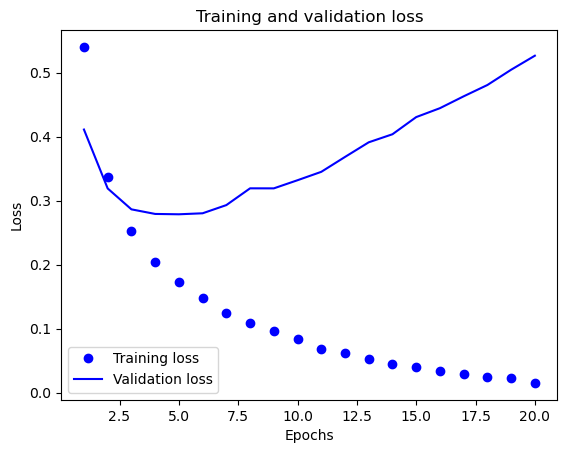

In [32]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(LIMIT_WORD,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model = compile_model(model)
history = fit_model(model)
plot_loss(history)

![graph](img/binary_class_model_validation_loss.png)

## Experimento 1

- Sustituir por un red más pequeña

Epoch 1/20
30/30 [==============================] - 2s 52ms/step - loss: 0.5679 - binary_accuracy: 0.7547 - val_loss: 0.4747 - val_binary_accuracy: 0.8492
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.4037 - binary_accuracy: 0.8843 - val_loss: 0.3833 - val_binary_accuracy: 0.8755
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3158 - binary_accuracy: 0.9102 - val_loss: 0.3333 - val_binary_accuracy: 0.8816
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2615 - binary_accuracy: 0.9233 - val_loss: 0.3038 - val_binary_accuracy: 0.8877
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2230 - binary_accuracy: 0.9342 - val_loss: 0.2875 - val_binary_accuracy: 0.8893
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1942 - binary_accuracy: 0.9436 - val_loss: 0.2957 - val_binary_accuracy: 0.8825
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - los

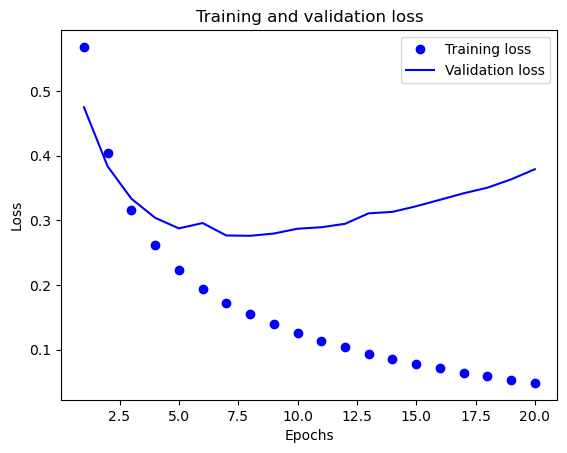

In [33]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(LIMIT_WORD,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model = compile_model(model)
history = fit_model(model)
plot_loss(history)

Se observa cómo el modelo empieza a sobreajustarse **mucho más tarde** que el original.

## Experimento 2

- Sustituimos por una red con mayor capacidad

Epoch 1/20
30/30 [==============================] - 4s 118ms/step - loss: 0.5722 - binary_accuracy: 0.7227 - val_loss: 0.3577 - val_binary_accuracy: 0.8609
Epoch 2/20
30/30 [==============================] - 2s 81ms/step - loss: 0.3235 - binary_accuracy: 0.8707 - val_loss: 0.2813 - val_binary_accuracy: 0.8844
Epoch 3/20
30/30 [==============================] - 2s 80ms/step - loss: 0.2399 - binary_accuracy: 0.9047 - val_loss: 0.2698 - val_binary_accuracy: 0.8871
Epoch 4/20
30/30 [==============================] - 2s 79ms/step - loss: 0.1890 - binary_accuracy: 0.9261 - val_loss: 0.2959 - val_binary_accuracy: 0.8804
Epoch 5/20
30/30 [==============================] - 2s 82ms/step - loss: 0.1438 - binary_accuracy: 0.9460 - val_loss: 0.2844 - val_binary_accuracy: 0.8867
Epoch 6/20
30/30 [==============================] - 2s 80ms/step - loss: 0.1122 - binary_accuracy: 0.9623 - val_loss: 0.3235 - val_binary_accuracy: 0.8860
Epoch 7/20
30/30 [==============================] - 2s 80ms/step - lo

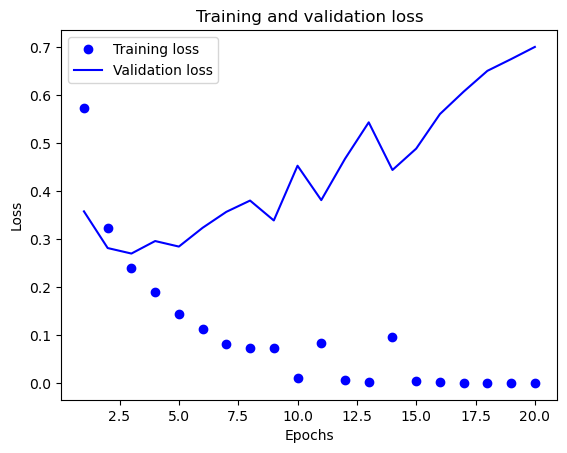

In [34]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(LIMIT_WORD,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model = compile_model(model)
history = fit_model(model)
plot_loss(history)

El modelo empieza a sobreajustarse inmediatamente y de forma más severa que el original (imagen inferior) y tiene una pérdida "ruidosa" en el entrenamiento.

<img src="img/binary_class_model_validation_loss.png">

## Experimento 3

- Añadiendo **_regularización_de_pesos_**:
    - Los regularizadores L1 hacen que el coste añadido sea proporcional al _valor_absoluto_ de los coeficientes de peso;
    - Los regularizadores L2 (decaimiento del peso), hacen que el coste añadido sea proporcional al _cuadrado del valor_ de los coeficientes de peso;

#### Añadiendo regularización L2 al modelo original

- `l2(0.001)` significa que cada coeficiente de la matriz de la capa añadirá `0.001 * valor_coeficiente_peso` a la pérdida de la red en tiempo de entrenamiento. 

Epoch 1/20
30/30 [==============================] - 4s 46ms/step - loss: 0.5977 - binary_accuracy: 0.7594 - val_loss: 0.4645 - val_binary_accuracy: 0.8692
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3942 - binary_accuracy: 0.8914 - val_loss: 0.3850 - val_binary_accuracy: 0.8763
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3117 - binary_accuracy: 0.9145 - val_loss: 0.3442 - val_binary_accuracy: 0.8885
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2700 - binary_accuracy: 0.9287 - val_loss: 0.3493 - val_binary_accuracy: 0.8818
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2442 - binary_accuracy: 0.9363 - val_loss: 0.3323 - val_binary_accuracy: 0.8875
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2237 - binary_accuracy: 0.9451 - val_loss: 0.3520 - val_binary_accuracy: 0.8814
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - los

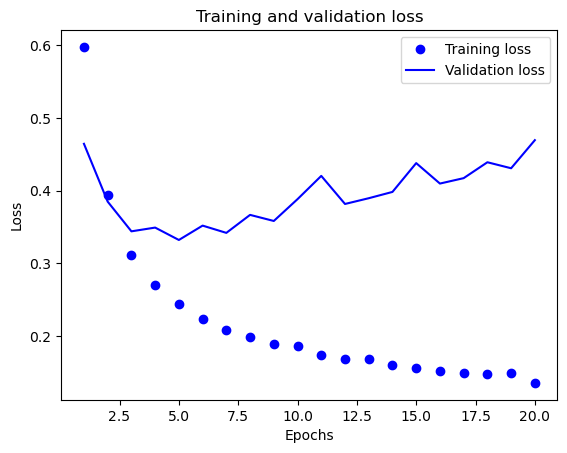

In [35]:
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(LIMIT_WORD,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model = compile_model(model)
history = fit_model(model)
plot_loss(history)

El modelo se ha vuelto mucho más resistente al overfitting que el original (imagen inferior). El experimento podría repetirse utilizando otros regularizadores _Keras_ como `l1(valor)` o `l1_l2(l1=valor, l2=valor)`, para realizar ambos simultáneamente.
<img src="img/binary_class_model_validation_loss.png">

## Experimento 4

- Añadiendo _dropout_. Esta técnica consiste en poner a 0 una proporción aleatoria de feturas de una matriz de activación en el momento del entrenamiento. Añadir ruido puede contribuir a romper el aprendizaje de patrones irrelevantes.

Epoch 1/20
30/30 [==============================] - 2s 46ms/step - loss: 0.6574 - binary_accuracy: 0.5957 - val_loss: 0.5814 - val_binary_accuracy: 0.8215
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.5555 - binary_accuracy: 0.7281 - val_loss: 0.4646 - val_binary_accuracy: 0.8617
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.4764 - binary_accuracy: 0.7961 - val_loss: 0.3858 - val_binary_accuracy: 0.8761
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.4141 - binary_accuracy: 0.8333 - val_loss: 0.3428 - val_binary_accuracy: 0.8770
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3593 - binary_accuracy: 0.8714 - val_loss: 0.3023 - val_binary_accuracy: 0.8836
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3174 - binary_accuracy: 0.8893 - val_loss: 0.2835 - val_binary_accuracy: 0.8903
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - los

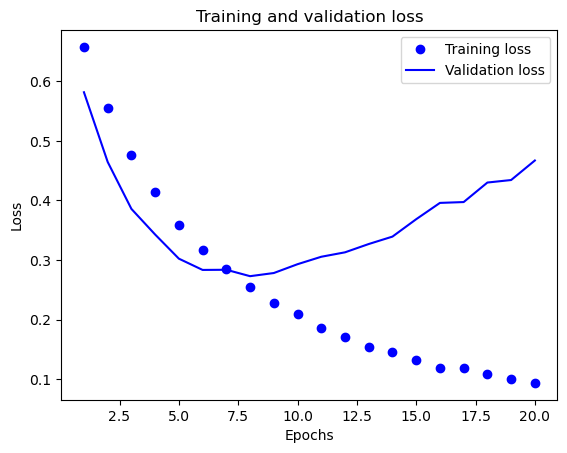

In [36]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(LIMIT_WORD,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model = compile_model(model)
history = fit_model(model)
plot_loss(history)

El **DROPOUT** muestra una clara mejora con respecto al modelo original (véase la imagen siguiente)
<img src="img/binary_class_model_validation_loss.png">

## Conclusiones
#### ¿Qué hacer en caso de sobreajuste (OVERFITTING)?
- Obtener más datos de entrenamiento
- Reducir la capacidad de la red (número de neuronas por capa)
- Añadir regularización de pesos (L1, L2)
- Añadir DROPOUT